In [33]:
import numpy as np
from bokeh.plotting import figure, output_file, show
import seaborn as sns
%matplotlib inline
import pandas as pd
sns.set(rc={'figure.figsize':(11.7,8.27)})
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima


### Simulate a WN process

In [29]:
#Random array
wn_array=np.random.random(size=100)
#Some dates to make it time series-ish looking
date_array=pd.date_range(start='1/1/2018', end='4/10/2018')
#pandas df
wn_df=pd.merge((pd.DataFrame(date_array, columns=['date'])), (pd.DataFrame(wn_array, columns=['wn_ts'])), left_index=True, right_index=True)

### White noise 'looks' like a Random Walk 

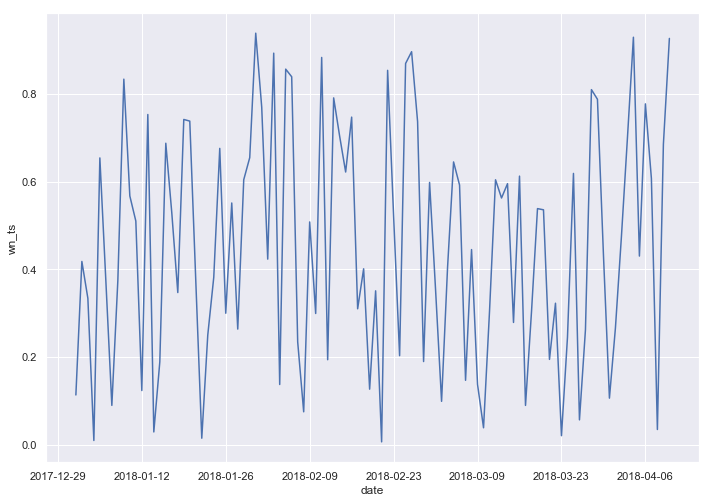

In [34]:
ax = sns.lineplot(x="date", y="wn_ts", data=wn_df)


## Nothing appears bad right off the bat, but look at the ACFs

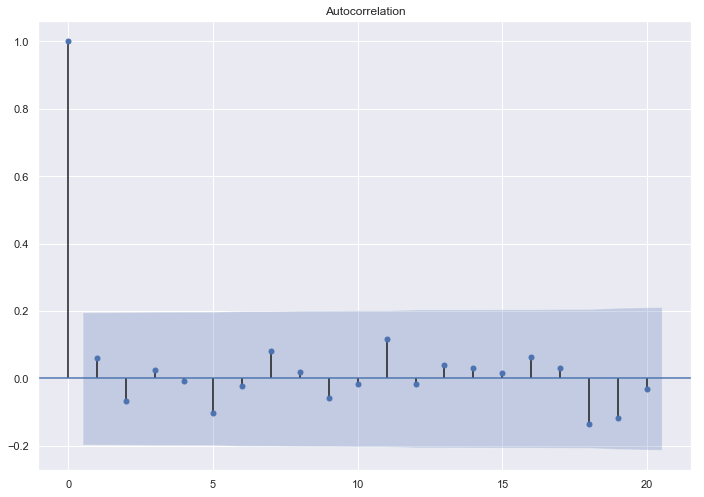

In [35]:
# Plot autocorrelation function of white noise returns
wn_acfs=plot_acf(wn_array, lags=20)


### And the PACFs

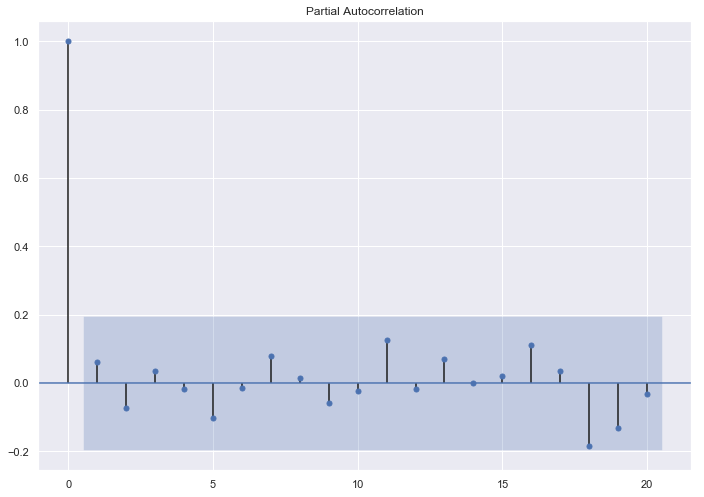

In [36]:
wn_pacfs= plot_pacf(wn_array, lags=20)


### What happens when you still try and model it anyways?

In [76]:
train,test=wn_df.iloc[0:81, 1:2], wn_df.iloc[81:, 1:2]

In [58]:
# Fit a simple auto_arima model
wn_arima =auto_arima(train, max_p=7, max_q=7)


c:\users\austi\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### MLE fails to converge

In [157]:
predictions=wn_arima.predict(n_periods=len(test))
predictions_df=pd.DataFrame(predictions, columns=['wn_ts'])
predictions_df['type']='predicted'
predictions_df['date']=pd.date_range(start='3/23/2018', end='4/10/2018')

In [171]:
actuals=wn_df.iloc[81:, ]
actuals.loc['type']='actuals'


c:\users\austi\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
combined=predictions_df.append(actuals, ignore_index=True)

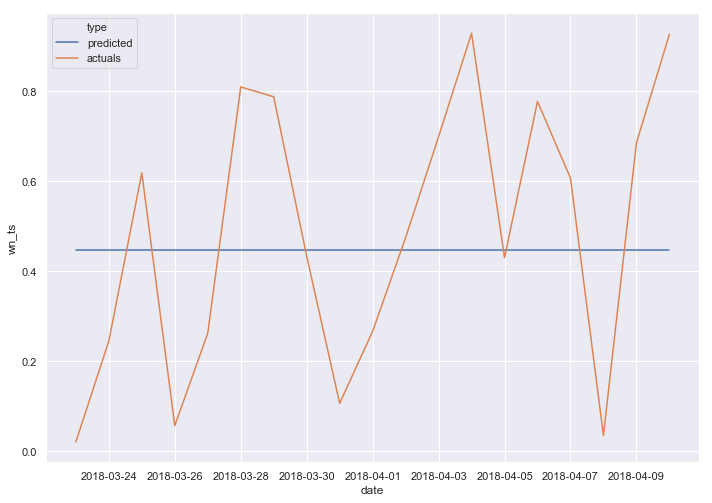

In [170]:
sns.lineplot(x="date", y="wn_ts", hue="type", data=combined)